# Task -1 Anomaly detection
## Student ID1: 314878877
## Student ID2: 207029786#### Github link: https://github.com/yuvalbm3/Anomaly-Detaction.git

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

In [2]:
f_path = "conn_attack.csv"
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


## Data Exploration

### Below we can see the description of the csv file we loaded, we can see the min/ max values of the features etc.

In [3]:
df.describe()

,record ID,duration_,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


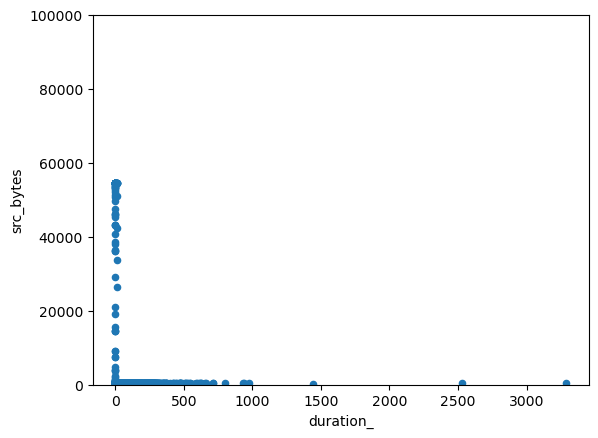

In [4]:
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples

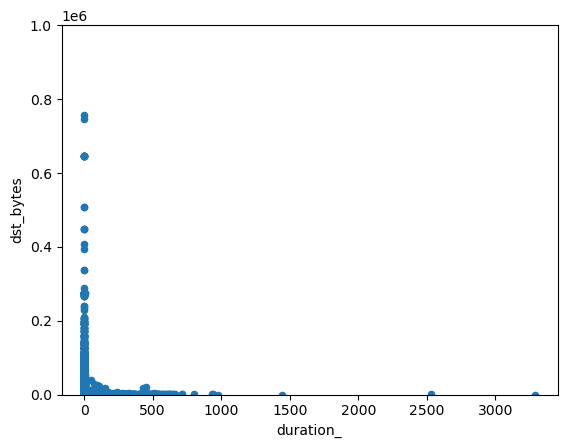

In [5]:
var = 'duration_'
data = pd.concat([df['dst_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='dst_bytes', ylim=(0,1000000)); # do not `assume here any thing this is just examples

### Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

In [6]:
df.corr() 

,record ID,duration_,src_bytes,dst_bytes
record ID,1.000000,0.027244,0.019209,-0.002970
duration_,0.027244,1.000000,-0.001714,-0.005791
src_bytes,0.019209,-0.001714,1.000000,0.010770
dst_bytes,-0.002970,-0.005791,0.010770,1.000000


### As we can see from the graph above the ratio between src_bytes and dst_bytes is 0.010770 and this is the reason we used is in the next formula.

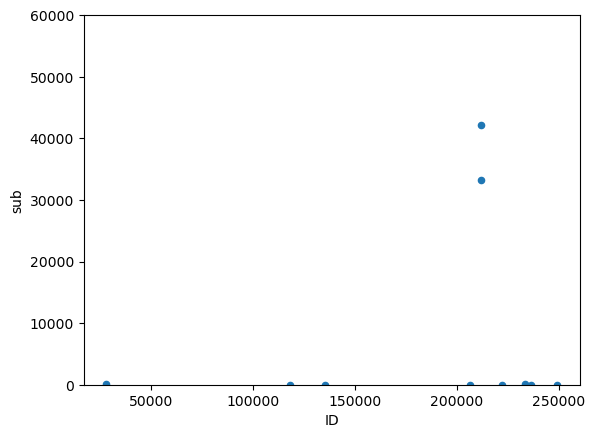

In [13]:
col={}
newdf = pd.DataFrame()
duration=df["duration_"].unique()
for i in duration:
    #temerary dictionary
    tem_dic={}
    dur_raw=df[(df["duration_"]==int(i))]
    tem_dic['sub']=abs(dur_raw['dst_bytes']*0.010770-(dur_raw['src_bytes']))
    tem_dic['ID']=dur_raw['record ID']
    med=tem_dic['sub'].median()
    tem_dic['sub']=abs(tem_dic['sub']-med)
    df_tem_dic = pd.DataFrame(data=tem_dic)
    col[i]=((new_df[(new_df['sub'])>med/0.010770]['ID']))
    if i == 14:
        example_14 = pd.concat([df_tem_dic['sub'], df_tem_dic['ID']], axis=1)
        example_14.plot.scatter(x='ID', y='sub', ylim=(0,60000));
col_list=list(col.values())
df_col_list=pd.DataFrame(data=col_list)
anomaly_list=[]
pred=[]
for i1 in (col_list):
    anomaly_list=anomaly_list+(list(i1))
# in this loop we orgenize the anomaly we predict in list for the confusion matrix
for i in range(1, len(df)):
    if (i) in anomaly_list:
        pred.append(1)
    else:
        pred.append(0)

The graph above is an example for anomaly in duration_ 14.

In [14]:
# we collect the answars from the file we get for the confusion matrix
f_path2 = "conn_attack_anomaly_labels.csv"
df2 = pd.read_csv(f_path2, names=["record ID", "label"], header=None)
df_label=df2[(df2["label"] == 1)]
test = []
record_list=(list(df_label['record ID']))
for i in range(1, len(df2)):
    if (i) in record_list:
        test.append(1)
    else:
        test.append(0)

# Answers to the Questions:
1. From the data exploration we've learned that both graph of (dst_bytes/duration_) and (src_bytes/duration_) are distribut in the same way, so it give us a hint to try and make the sub of them, and according to this to get the anomaly of them from the graph of (x = abs(sub(dst_bytes - src_bytes)), y = duration_).
<Br>
2. The suitable algorithm group for the task is unsupervisied algorithm cause the data is not label, and we use this algorithm group in those cases.
<Br>
3. A. The approch we try is MAD (median absolute deviation) algorithem. We did it cause this algorithm is unsupervisied algorithm and we had numeric data, so it was easy to calculate the median of the absolute values of all the deviations, and then we get the precsion and recall value and we saw that they were pretty good. 
<Br>B.We know this algorithm is good accordinf to comparing we had with the results we get that we have only 8 anomaly we didn't get (from 1022) anomalies and it's easy to undersatand that is negligible (less than 1%). Likewise according to the confusion matrix and the precision and recall value as you can see in the next question.
<Br>
4. Confusion Matrix:

In [15]:
# confusion_matrix(test, pred)

def plot(test, pred):
    labels = [0, 1]
    column = "Predicted condition"
    index = "Actual condition"
    table = pd.DataFrame(confusion_matrix(test, pred), labels)
    return table

plot(test, pred)

,0,1
0,255643,4
1,8,1014


In [22]:
recall = recall_score(test, pred)
accuracy = accuracy_score(test, pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

Accuracy: 0.9999532471782724
Recall: 0.9921722113502935
